NAME: DEEPESH BHATTA



### Problem-2 A) Use the following parameters to generate 2D Gaussian random samples for different clusters.
### µ0 = [1, 0], µ1 = [0, 1], Σ0 = [[1, 0.75],  [0.75, 1] ], Σ1 = [[1, −0.5], [0.5, 1]]
### Generate N = 200 training samples for each class and assign class labels 0 and 1 for each class. You can do the same for testing samples; generate N = 50 for each class for testing set to evaluate your model. The first 2 columns in train should be the 2D Gaussian random data and the last column should be the class label. Use L2-norm of vectors to compute distance between different samples. Try out different k = 1, 2, 3, 4, 5, 10, 20 to test your k-NN classifier. Show the changes of accuracy w.r.t. the k. Summarize your observation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean_1 = np.array([1,0])
mean_2 = np.array([0,1])
variance_1 = np.array([[1, 0.75], [0.75, 1]])
variance_2 = np.array([[1, 0.5], [0.5, 1]])

In [3]:
gaussian_train_1 = np.random.multivariate_normal(mean_1, variance_1, 200)
gaussian_train_2 = np.random.multivariate_normal(mean_2, variance_2, 200)
y_train_1 = np.zeros((200), dtype=np.float)
y_train_2 = np.ones((200), dtype=np.float)
x_train = np.concatenate((gaussian_train_1, gaussian_train_2), axis=0)
y_train = np.concatenate((y_train_1, y_train_2), axis=0)

gaussian_test_1 = np.random.multivariate_normal(mean_1, variance_1, 50)
gaussian_test_2 = np.random.multivariate_normal(mean_2, variance_2, 50)
y_test_1 = np.zeros((50), dtype=np.float)
y_test_2 = np.ones((50), dtype=np.float)
x_test = np.concatenate((gaussian_test_1, gaussian_test_2), axis=0)
y_test = np.concatenate((y_test_1, y_test_2), axis=0)
X = np.insert(x_train, 2, values = y_train, axis = 1)
test = np.insert(x_test, 2, values = y_test, axis = 1)

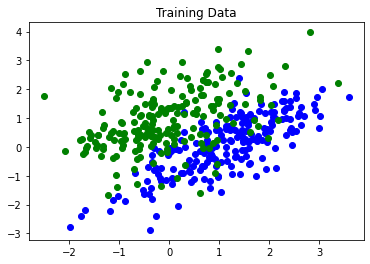

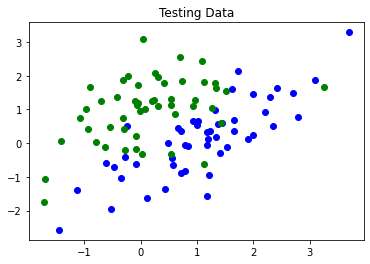

In [4]:
plt.plot(gaussian_train_1[:, 0], gaussian_train_1[:, 1], 'bo')
plt.plot(gaussian_train_2[:, 0], gaussian_train_2[:, 1], 'go')
plt.title("Training Data")
plt.show()

plt.plot(gaussian_test_1[:, 0], gaussian_test_1[:, 1], 'bo')
plt.plot(gaussian_test_2[:, 0], gaussian_test_2[:, 1], 'go')
plt.title("Testing Data")
plt.show()

In [5]:
from knnclassification import myknnclassify, getAccuracy
k = [1,2,3,4,5,10,20]
for i in k:
    print("K: ", i)
    print('Predicted Label: ' + repr(myknnclassify(X, test[30], i)), ' | Actual Label: ', test[30][-1])

K:  1
Predicted Label: 0.0  | Actual Label:  0.0
K:  2
Predicted Label: 0.0  | Actual Label:  0.0
K:  3
Predicted Label: 0.0  | Actual Label:  0.0
K:  4
Predicted Label: 0.0  | Actual Label:  0.0
K:  5
Predicted Label: 0.0  | Actual Label:  0.0
K:  10
Predicted Label: 0.0  | Actual Label:  0.0
K:  20
Predicted Label: 0.0  | Actual Label:  0.0


In [6]:
scores = []
for i in k:
    print("K: ", i)
    scores.append(getAccuracy(X, test, i)) 
    print("***********")

K:  1
Accuracy: 75.0
***********
K:  2
Accuracy: 75.0
***********
K:  3
Accuracy: 83.0
***********
K:  4
Accuracy: 82.0
***********
K:  5
Accuracy: 83.0
***********
K:  10
Accuracy: 87.0
***********
K:  20
Accuracy: 88.0
***********


Text(0, 0.5, 'Testing Accuracy')

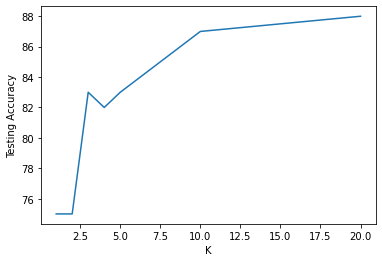

In [7]:
import matplotlib.pyplot as plt
plt.plot(k, scores)
plt.xlabel('K')
plt.ylabel('Testing Accuracy')